In [14]:
#!pip install geopandas

In [15]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

# Identificación de Oportunidades Comerciales en Rehabilitación Energética

## Problema
El cumplimiento de las normativas energéticas de **2030** y **2033** requiere rehabilitar miles de edificios residenciales.  
**Constructoras**, **financieras** y **administraciones públicas** necesitan priorizar sus recursos en proyectos con alto retorno económico y social, pero actualmente no tienen herramientas para hacerlo de forma eficiente.

## Datos y Variable a Predecir
He recopilado datos de edificios residenciales en Bilbao que incluyen:
- Calificaciones energéticas actuales y post-intervención.
- Costos por metro cuadrado.
- Características como número de viviendas o zona climática.

### Variable a Predecir:
**Plazo de intervención**, clasificando los edificios en:
1. **2030**
2. **2033**
3. **No cumplen**

## Impacto
Este modelo ayudará a:
- **Constructoras:** Identificar proyectos rentables.
- **Financieras:** Evaluar el riesgo y diseñar productos específicos.
- **Administraciones públicas:** Focalizar ayudas en barrios prioritarios.

Así, se optimizarán recursos y se acelerará el cumplimiento de los objetivos climáticos.


## Descripción de los Datos

Los datos utilizados en este proyecto han sido obtenidos de la plataforma **Urban3R** ([urban3r.es](https://urban3r.es)), una herramienta promovida por la Dirección General de Agenda Urbana y Arquitectura del Ministerio de Transportes, Movilidad y Agenda Urbana del Gobierno de España. Esta herramienta está diseñada para impulsar la regeneración urbana en España, alineándose con la **Estrategia de Rehabilitación Energética en Edificios en España (ERESEE 2020)**.

### Campos Clave de los Datos
1. **Identificación:**
   - `referencia_catastral`: Código catastral del edificio.
   - `nombre_municipio`, `codigo_ine`, `codigo_provincia`: Información geográfica básica.

2. **Características del Edificio:**
   - `uso_principal`: Uso principal del inmueble.
   - `altura_maxima`, `altura_maxima_categoria`: Número de plantas y su categoría.
   - `tipologia_edificio`: Tipología estructural del edificio.
   - `ano_construccion`, `ano_construccion_categoria`: Año de construcción y su categoría.

3. **Eficiencia Energética:**
   - `demanda_calefaccion`: Demanda energética actual (kWh/m²·año).
   - `demanda_calefaccion_post_intervencion`: Demanda energética tras la intervención (kWh/m²·año).
   - `calificacion_demanda_calefaccion`: Calificación energética actual.
   - `calificacion_demanda_calefaccion_post_intervencion`: Calificación energética tras la intervención.

4. **Costos de Intervención:**
   - `coste_intervencion_m2`: Costo estimado por metro cuadrado.
   - `coste_intervencion_viv`: Costo estimado por vivienda.

### Fuente
La información y los datos se han generado mediante la herramienta **urbanZEB**, desarrollada por **Cíclica [space · community · ecology]**. Más detalles sobre la metodología y segmentación de los datos pueden consultarse en los documentos oficiales:
- [Segmentación del Parque Residencial en Clústeres Tipológicos](https://cdn.mitma.gob.es/portal-web-drupal/planes_estartegicos/1_2020_segmentacion_parque_residencial_clusteres.pdf)
- [Aproximación a la Demanda Energética Residencial para Calefacción en España](https://cdn.mitma.gob.es/portal-web-drupal/planes_estartegicos/2_2020_aproximacion_demanda_residencial.pdf)

Este dataset ofrece una base sólida para analizar y priorizar rehabilitaciones energéticas a nivel de edificio.


# Identificación de Oportunidades Comerciales en Rehabilitación Energética en Bilbao

## Descripción del Proyecto

Este proyecto utiliza Machine Learning para clasificar edificios residenciales en Bilbao según su **potencial de rehabilitación energética**. El objetivo es identificar oportunidades comerciales y priorizar intervenciones para:
- **Constructoras:** Maximizar el retorno económico de los proyectos.
- **Financieras:** Evaluar edificios de bajo riesgo y alto retorno para productos financieros específicos.
- **Administraciones públicas:** Focalizar ayudas en zonas con mayor necesidad y alto impacto social.

## Contexto del Proyecto

El objetivo del proyecto es **priorizar intervenciones** de rehabilitación energética para alcanzar los estándares normativos en **Edificios Residenciales** en Bilbao.

### Requisitos Normativos
Según la **Directiva Europea de Eficiencia Energética** y su implementación en España:
- **2030:** Las viviendas deben alcanzar una calificación energética mínima de **E** para poder ser vendidas o alquiladas.
- **2033:** La exigencia sube a una calificación energética mínima de **D**.

Fuente: [Directiva 2010/31/UE y Plan Nacional Integrado de Energía y Clima (PNIEC)](https://www.miteco.gob.es/es/cambio-climatico/temas/energia-y-clima/pniec.aspx).

### Objetivo General
Mejorar la **eficiencia energética** en el sector residencial, que actualmente representa una proporción significativa del consumo energético y las emisiones de carbono.

Este análisis se enfoca en identificar los edificios prioritarios para intervención, optimizando el impacto social, económico y ambiental.

## Variable a Predecir
**Plazo de intervención (`plazo_intervencion`)**:  
- `2030`: Edificios con intervenciones rápidas y rentables.
- `2033`: Edificios con intervenciones más complejas o costosas.
- `No cumple`: Edificios que no alcanzan los objetivos normativos.

Este análisis busca optimizar la planificación y ejecución de las rehabilitaciones energéticas, facilitando la toma de decisiones estratégicas en sectores clave.


## Importancia del Sector Residencial en Emisiones y Consumo Energético

El sector residencial tiene un impacto significativo en el consumo energético y las emisiones de CO₂ en España:

### **1. Emisiones de CO₂ por Sector**
El sector residencial contribuye de manera importante a las emisiones totales de CO₂ en España:
[Distribución de Emisiones de CO₂ por Sector](https://www.energiaysociedad.es/wp-content/uploads/2018/05/Emisiones-CO2-por-sector.png)
- **Fuente:** [Energía y Sociedad](https://www.energiaysociedad.es/asi-se-reparten-las-emisiones-de-co2-entre-los-principales-sectores-de-espana/)

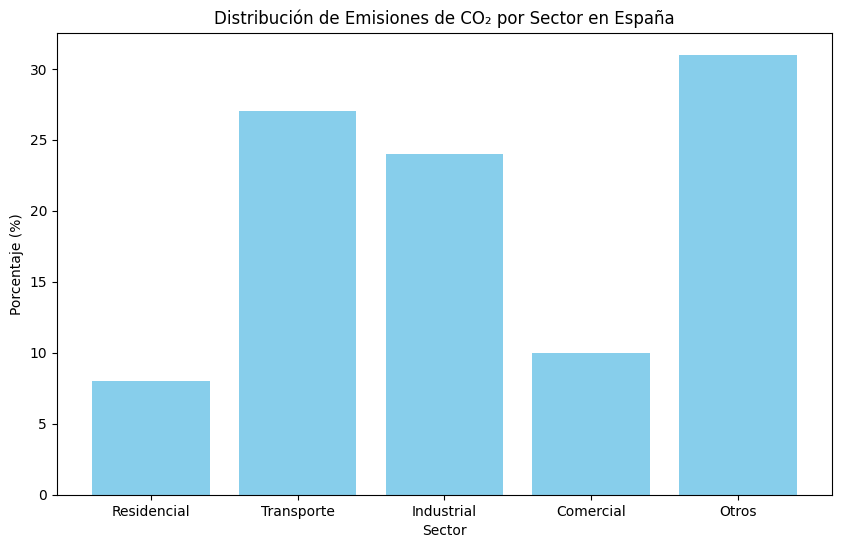

In [16]:
# Datos aproximados para emisiones de CO₂ por sector
sectors = ['Residencial', 'Transporte', 'Industrial', 'Comercial', 'Otros']
emissions = [8, 27, 24, 10, 31]  # Porcentajes aproximados

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(sectors, emissions, color='skyblue')
plt.title('Distribución de Emisiones de CO₂ por Sector en España')
plt.ylabel('Porcentaje (%)')
plt.xlabel('Sector')
plt.show()


### **2. Consumo Energético por Uso**
En los hogares españoles, el consumo energético se distribuye principalmente en:
- **Calefacción:** 47%.
- **Agua caliente sanitaria:** 18%.
- **Electrodomésticos y cocina:** 26%.
- **Iluminación y otros usos:** 9%.
[Distribución del Consumo Energético en el Hogar](https://www.idae.es/sites/default/files/energia_residencial_idae_0.jpg)
- **Fuente:** [IDAE](https://www.idae.es/uploads/documentos/documentos_Informe_SPAHOUSEC_ACC_f68291a3.pdf)


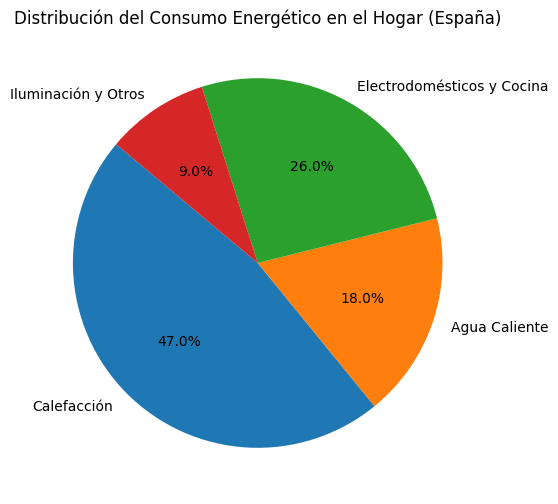

In [17]:
# Datos aproximados para el consumo energético
categories = ['Calefacción', 'Agua Caliente', 'Electrodomésticos y Cocina', 'Iluminación y Otros']
percentages = [47, 18, 26, 9]

# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(percentages, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title('Distribución del Consumo Energético en el Hogar (España)')
plt.show()


### **Conclusión**
Estos datos subrayan la importancia de mejorar la eficiencia energética en los edificios residenciales para reducir tanto el consumo de energía como las emisiones de carbono.

In [20]:
# Cargar el CSV en un DataFrame
df = pd.read_csv('48020/48020.csv')

In [21]:
df.head()

,Unnamed: 0,referencia_catastral,codigo_ine,nombre_municipio,codigo_provincia,zona_climatica,uso_principal,altura_maxima,altura_maxima_categoria,tipologia_edificio,...,superficie_vivienda,numero_viviendas,numero_viviendas_categoria,cluster,demanda_calefaccion,demanda_calefaccion_post_interverncion,calificacion_demanda_calefaccion,calificacion_demanda_calefaccion_post_intervencion,coste_intervencion_m2,coste_intervencion_viv
0,0,4802010101001,48020,Bilbao,48,C1,Común,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,4802081399166,48020,Bilbao,48,C1,Aparcamiento,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,4802081399168,48020,Bilbao,48,C1,Almacenaje,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4802081399167,48020,Bilbao,48,C1,Almacenaje,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4802081399169,48020,Bilbao,48,C1,Almacenaje,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11405 entries, 0 to 11404
Data columns (total 22 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Unnamed: 0                                          11405 non-null  int64  
 1   referencia_catastral                                11405 non-null  int64  
 2   codigo_ine                                          11405 non-null  int64  
 3   nombre_municipio                                    11405 non-null  object 
 4   codigo_provincia                                    11405 non-null  int64  
 5   zona_climatica                                      11405 non-null  object 
 6   uso_principal                                       11405 non-null  object 
 7   altura_maxima                                       8564 non-null   float64
 8   altura_maxima_categoria                             8564 non-null   object 


In [23]:
df.describe()

,Unnamed: 0,referencia_catastral,codigo_ine,codigo_provincia,altura_maxima,ano_construccion,superficie_vivienda,numero_viviendas,demanda_calefaccion,demanda_calefaccion_post_interverncion,coste_intervencion_m2,coste_intervencion_viv
count,11405.000000,1.140500e+04,11405.0,11405.0,8564.000000,8564.000000,8404.000000,11405.000000,8564.000000,8564.000000,8564.000000,8404.000000
mean,5702.000000,4.802050e+12,48020.0,48.0,5.141990,1950.479449,1641.873751,14.417536,76.090870,24.739019,80.938884,7644.032370
std,3292.484244,2.342735e+07,0.0,0.0,2.895819,31.542151,2063.114937,22.364553,32.493175,6.679430,23.601817,5306.814962
min,0.000000,4.802010e+12,48020.0,48.0,-3.000000,1700.000000,3.000000,0.000000,22.450000,12.480000,0.000000,475.040000
25%,2851.000000,4.802023e+12,48020.0,48.0,3.000000,1930.000000,441.750000,1.000000,58.260000,20.740000,62.270000,4939.397500
50%,5702.000000,4.802053e+12,48020.0,48.0,5.000000,1958.000000,1142.500000,9.000000,69.650000,24.470000,72.640000,6275.830000
75%,8553.000000,4.802072e+12,48020.0,48.0,7.000000,1969.000000,2061.250000,20.000000,74.030000,25.040000,88.870000,8439.752500
max,11404.000000,4.802082e+12,48020.0,48.0,27.000000,2017.000000,38495.000000,535.000000,155.260000,52.390000,150.380000,175984.520000


<Axes: >

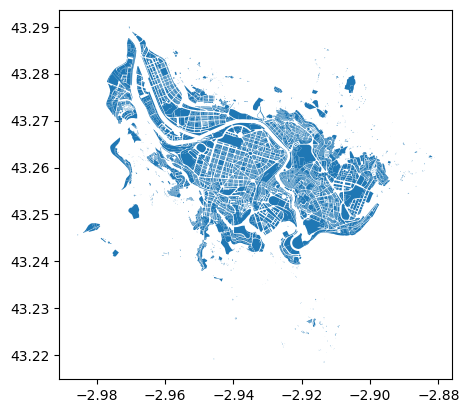

In [24]:
# Cargar el archivo GeoPackage
gdf = gpd.read_file('48020/48020.gpkg')

# Visualizar en mapa interactivo
gdf.plot()


In [25]:
gdf.head()

,referencia_catastral,codigo_ine,nombre_municipio,codigo_provincia,zona_climatica,uso_principal,altura_maxima,altura_maxima_categoria,tipologia_edificio,ano_construccion,...,numero_viviendas,numero_viviendas_categoria,cluster,demanda_calefaccion,demanda_calefaccion_post_interverncion,calificacion_demanda_calefaccion,calificacion_demanda_calefaccion_post_intervencion,coste_intervencion_m2,coste_intervencion_viv,geometry
0,4802010101001,48020,Bilbao,48,C1,Común,NaN,None,None,NaN,...,0,None,None,NaN,NaN,None,None,NaN,NaN,"MULTIPOLYGON (((-2.97034 43.29004, -2.97032 43..."
1,4802081399166,48020,Bilbao,48,C1,Aparcamiento,NaN,None,None,NaN,...,0,None,None,NaN,NaN,None,None,NaN,NaN,"MULTIPOLYGON (((-2.95852 43.25414, -2.9585 43...."
2,4802081399168,48020,Bilbao,48,C1,Almacenaje,NaN,None,None,NaN,...,0,None,None,NaN,NaN,None,None,NaN,NaN,"MULTIPOLYGON (((-2.95439 43.25327, -2.95442 43..."
3,4802081399167,48020,Bilbao,48,C1,Almacenaje,NaN,None,None,NaN,...,0,None,None,NaN,NaN,None,None,NaN,NaN,"MULTIPOLYGON (((-2.95448 43.25322, -2.95454 43..."
4,4802081399169,48020,Bilbao,48,C1,Almacenaje,NaN,None,None,NaN,...,0,None,None,NaN,NaN,None,None,NaN,NaN,"MULTIPOLYGON (((-2.95956 43.25371, -2.9596 43...."


In [26]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 11405 entries, 0 to 11404
Data columns (total 22 columns):
 #   Column                                              Non-Null Count  Dtype   
---  ------                                              --------------  -----   
 0   referencia_catastral                                11405 non-null  object  
 1   codigo_ine                                          11405 non-null  object  
 2   nombre_municipio                                    11405 non-null  object  
 3   codigo_provincia                                    11405 non-null  object  
 4   zona_climatica                                      11405 non-null  object  
 5   uso_principal                                       11405 non-null  object  
 6   altura_maxima                                       8564 non-null   float64 
 7   altura_maxima_categoria                             8564 non-null   object  
 8   tipologia_edificio                                  8564 n

In [27]:
gdf.describe()

,altura_maxima,ano_construccion,superficie_vivienda,numero_viviendas,demanda_calefaccion,demanda_calefaccion_post_interverncion,coste_intervencion_m2,coste_intervencion_viv
count,8564.000000,8564.000000,8404.000000,11405.000000,8564.000000,8564.000000,8564.000000,8404.000000
mean,5.141990,1950.479449,1641.873751,14.417536,76.090870,24.739019,80.938884,7644.032370
std,2.895819,31.542151,2063.114937,22.364553,32.493175,6.679430,23.601817,5306.814962
min,-3.000000,1700.000000,3.000000,0.000000,22.450000,12.480000,0.000000,475.040000
25%,3.000000,1930.000000,441.750000,1.000000,58.260000,20.740000,62.270000,4939.397500
50%,5.000000,1958.000000,1142.500000,9.000000,69.650000,24.470000,72.640000,6275.830000
75%,7.000000,1969.000000,2061.250000,20.000000,74.030000,25.040000,88.870000,8439.752500
max,27.000000,2017.000000,38495.000000,535.000000,155.260000,52.390000,150.380000,175984.520000
